In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,recall_score
from sklearn.model_selection import train_test_split 


In [19]:
#lets load the boston houe pricing dataset
#/Users/adityabattula/Documents/DevTown Internship/Predicting the House Price/boston_house_prices.csv
data = pd.read_csv('housing.csv')
df = pd.DataFrame(data)

In [56]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [21]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [23]:
print(df.describe)

<bound method NDFrame.describe of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396

# Preparing the dataset


In [60]:
df.rename(columns={'medv':'target'}, inplace=True)

In [59]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [62]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
target     0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# EDA


In [29]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,target
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

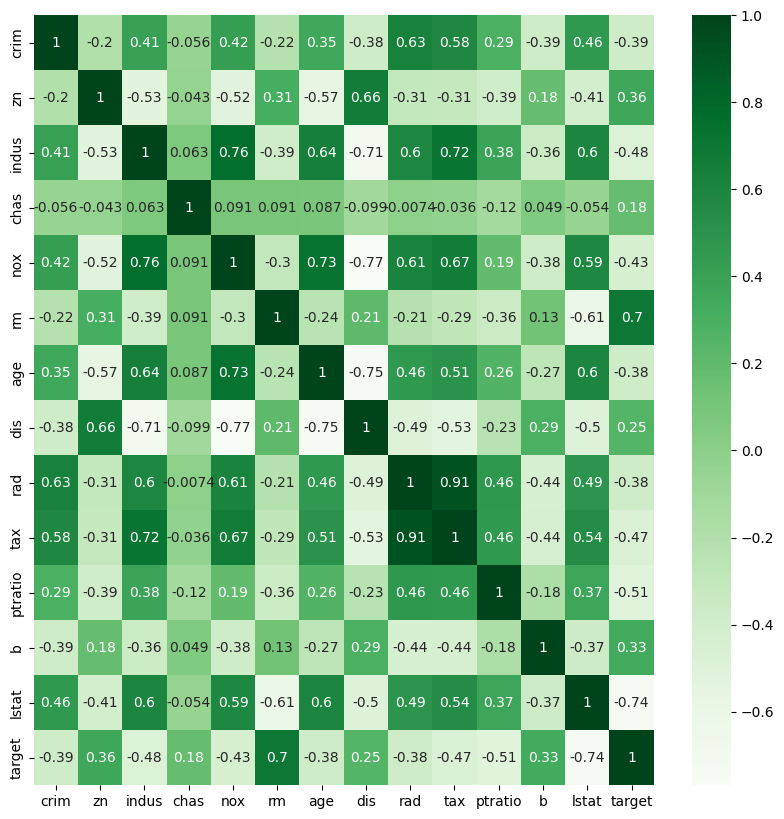

In [69]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="Greens")

/Users/adityabattula/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


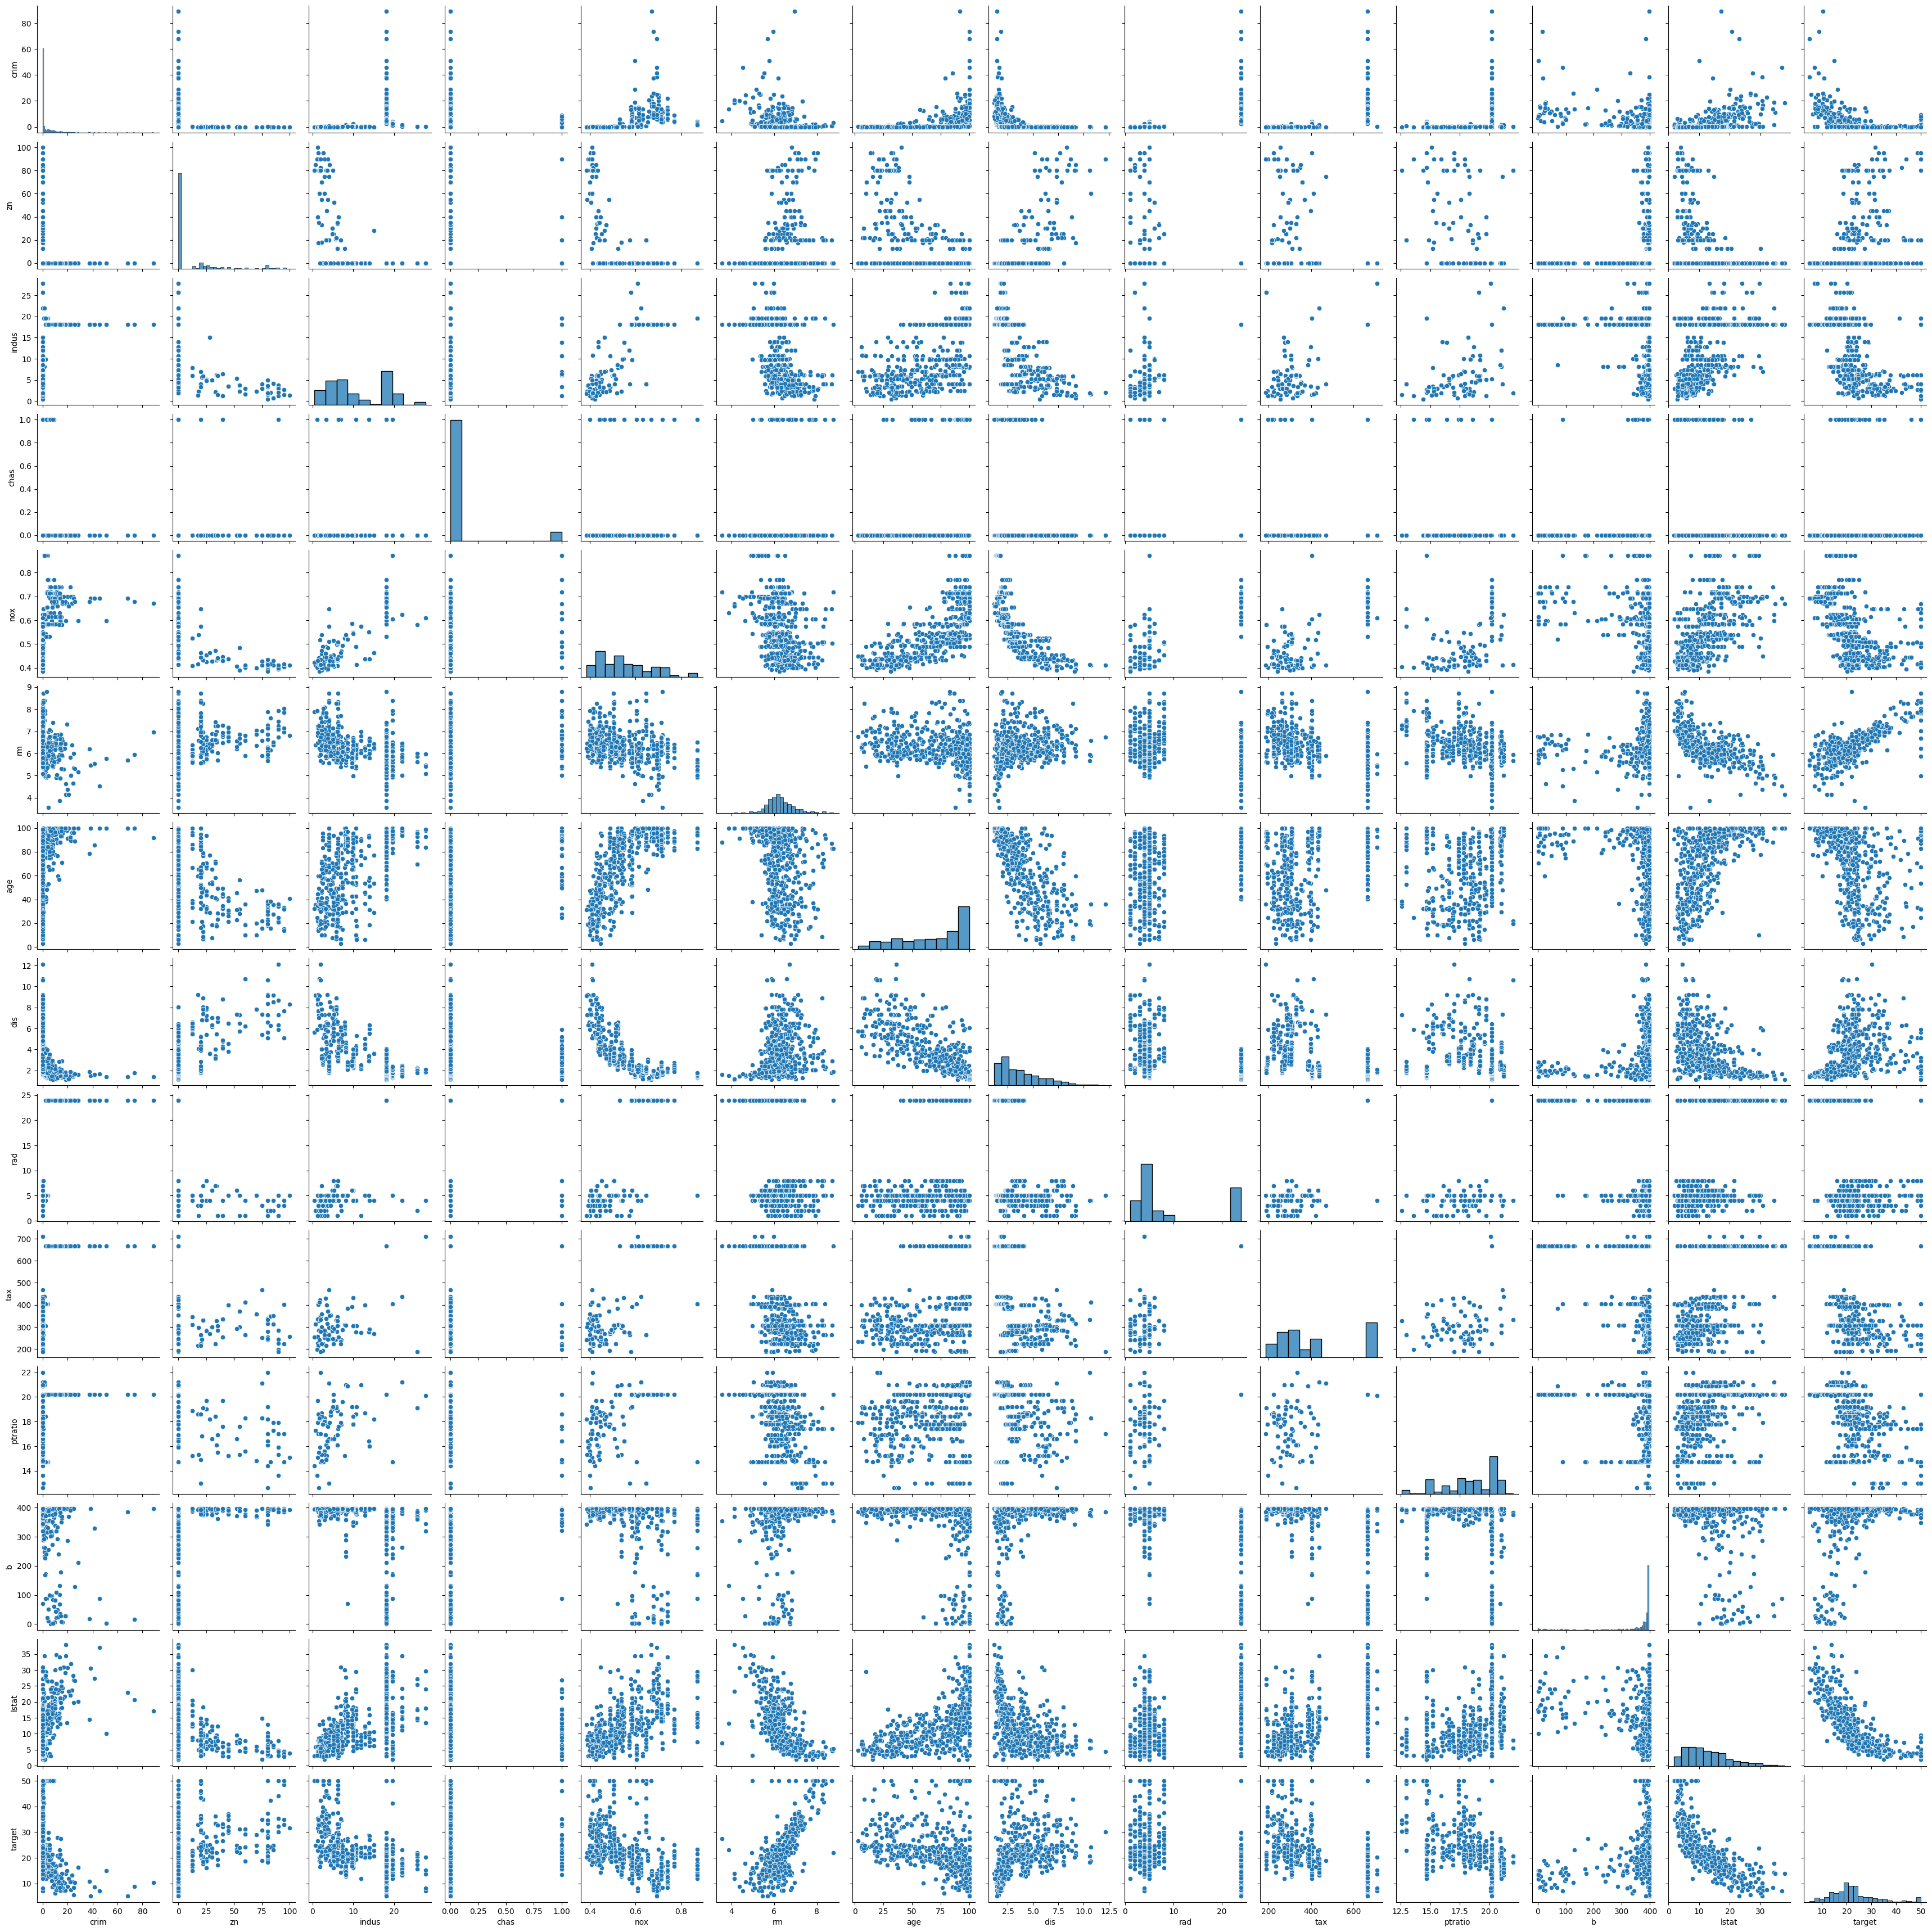

In [72]:
sns.pairplot(df)

Text(0, 0.5, 'price')

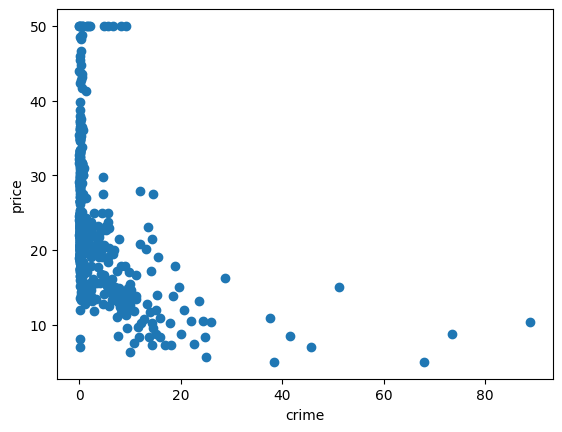

In [75]:
plt.scatter(df["crim"],df["target"])
plt.xlabel("crime")
plt.ylabel("price")

Text(0, 0.5, 'price')

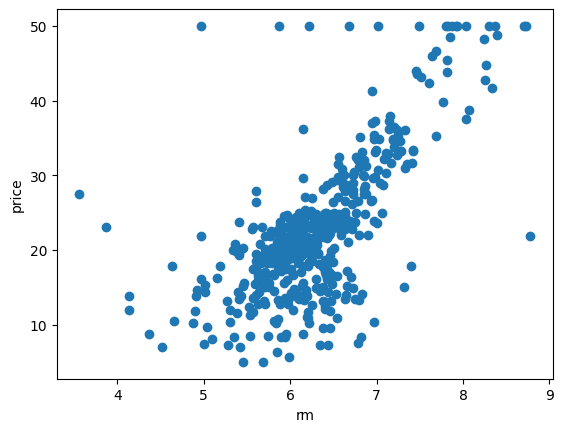

In [76]:
plt.scatter(df["rm"],df["target"])
plt.xlabel("rm")
plt.ylabel("price")

<Axes: xlabel='rm', ylabel='target'>

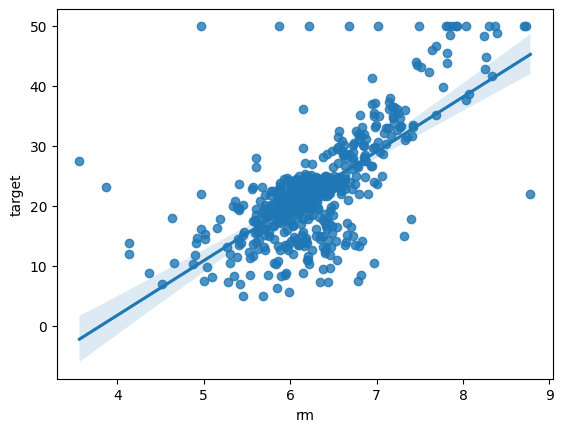

In [37]:
sns.regplot(x="rm",y="target",data=df)

<Axes: xlabel='lstat', ylabel='target'>

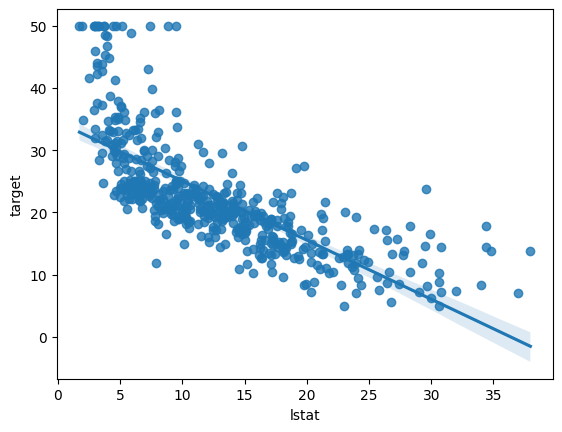

In [38]:
sns.regplot(x="lstat",y="target",data=df)

In [77]:
# Independent and dependent feature

x = df.iloc[:,:-1]
y = df.iloc[:,-1]



In [41]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [42]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [79]:
# train_test_split

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.4,random_state=34)


In [80]:
Y_train.head()

357    21.7
406    11.9
310    16.1
195    50.0
71     21.7
Name: target, dtype: float64

In [82]:
X_test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
218,0.11069,0.0,13.89,1,0.550,5.951,93.8,2.8893,5,276,16.4,396.90,17.92
370,6.53876,0.0,18.10,1,0.631,7.016,97.5,1.2024,24,666,20.2,392.05,2.96
451,5.44114,0.0,18.10,0,0.713,6.655,98.2,2.3552,24,666,20.2,355.29,17.73
230,0.53700,0.0,6.20,0,0.504,5.981,68.1,3.6715,8,307,17.4,378.35,11.65
165,2.92400,0.0,19.58,0,0.605,6.101,93.0,2.2834,5,403,14.7,240.16,9.81


In [49]:
#standardizing the dataset(data preprocessingS)

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [50]:
X_train = scalar.fit_transform(X_train)

In [51]:
X_test = scalar.fit_transform(X_test)

In [52]:
X_train

array([[ 0.00349935, -0.49457865,  1.02379583, ...,  0.81455974,
         0.39919393,  0.10276864],
       [ 1.8870951 , -0.49457865,  1.02379583, ...,  0.81455974,
         0.17445395,  1.50362958],
       [-0.13210078, -0.49457865, -0.18211449, ..., -0.03913142,
        -0.03592055,  0.01512789],
       ...,
       [-0.40325415, -0.49457865,  2.44147576, ...,  0.76713245,
        -0.3766485 ,  2.38560162],
       [-0.41603778, -0.49457865,  2.13411569, ...,  0.29285958,
         0.25819938,  0.751032  ],
       [ 2.47053907, -0.49457865,  1.02379583, ...,  0.81455974,
        -2.40984301,  1.9627002 ]])

In [53]:
X_test

array([[-0.39895264, -0.47892883,  0.39745711, ..., -0.89934354,
         0.41478134,  0.72149314],
       [ 0.40318304, -0.47892883,  1.00469865, ...,  0.79646093,
         0.35886137, -1.40107833],
       [ 0.266215  , -0.47892883,  1.00469865, ...,  0.79646093,
        -0.06497747,  0.69453534],
       ...,
       [-0.39167385, -0.47892883,  2.09369475, ...,  0.30557016,
         0.27780622,  0.28023663],
       [-0.38534094, -0.47892883, -0.60932339, ..., -0.22994704,
         0.41478134,  0.47745417],
       [-0.41025829,  3.43552019, -1.21944969, ..., -1.65799291,
         0.34156653, -1.41242898]])

# Model Training


In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
regression = LinearRegression()

In [86]:
regression.fit(X_train,Y_train)

LinearRegression()

In [87]:
## print the coefficients and the intercept
print(regression.coef_)

[-8.36628687e-02  5.79496358e-02  6.04590206e-02  1.84775019e+00
 -1.80248369e+01  2.59694686e+00  3.31904567e-02 -1.37050860e+00
  3.38319571e-01 -1.27810645e-02 -9.76075987e-01  1.29333923e-02
 -6.55155397e-01]


In [88]:
print(regression.intercept_)

41.804786535349535


In [89]:
## on wich parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [90]:
### Prediciton with Test data
reg_pred=regression.predict(X_test)

In [91]:
reg_pred

array([24.72653331, 35.65649299, 19.7762727 , 24.87081091, 26.5117045 ,
       31.2202461 , 17.94510858, 13.17645833, 24.55687108, 22.50758832,
       11.44677415, 26.74419306, 30.73701294, 21.25867968, 35.87358463,
       16.26321024, 21.14170468, 29.49263343, 19.81399833, 30.4127719 ,
       20.51570039, 11.15961842, 26.1274335 , 34.20341917, 20.73627438,
       25.0119438 , 21.21774002, 20.26177051, 23.56141734, 18.56225513,
        4.51902261, 31.20965823, 35.87426983, 22.00666109, 26.54440198,
       21.59212138, 16.45795263, 25.92919976, 21.46410681, 27.7273819 ,
       18.89377971, 18.13940964, 13.05323132,  1.96559363, 20.85323633,
       20.62292238,  9.20499157, 39.96774609, 24.21329135, 17.48294484,
       32.01559581, 24.96047375, 27.03738624, 29.97343281, 14.1451859 ,
       21.83719199, 23.57361558, 28.13404018, 21.28328509, 17.76298076,
       18.64524969, 18.81584638, 22.19122859, 18.96170363, 19.28666814,
       19.14470873, 12.47073509, 29.83997808, 24.86037939, 15.87

# Assumptions

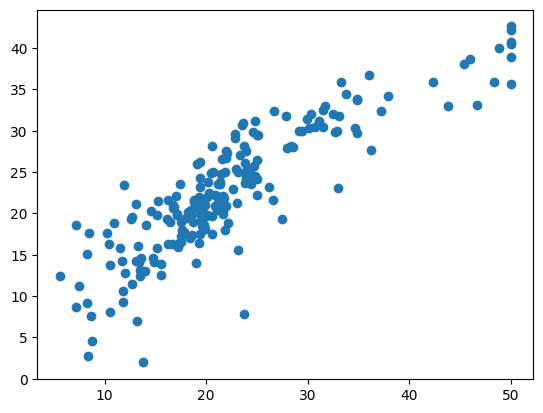

In [95]:
## plot a scatter plot for the prediction
plt.scatter(Y_test,reg_pred)


In [96]:
residuals = Y_test-reg_pred

In [97]:
residuals

218    -3.226533
370    14.343507
451    -4.576273
230    -0.570811
165    -1.511704
         ...    
476    -4.286868
177    -5.242741
125    -2.124574
49      1.923339
204     7.815108
Name: target, Length: 203, dtype: float64

/Users/adityabattula/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


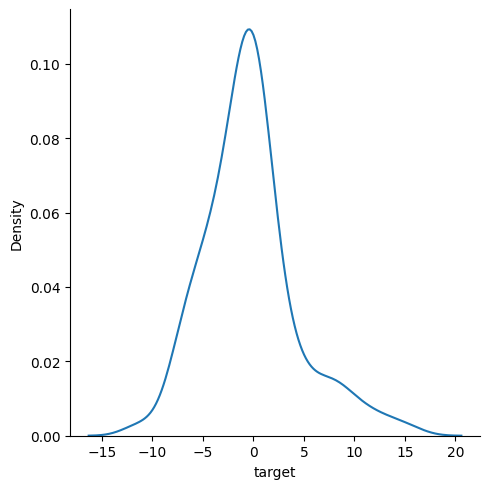

In [100]:
## plot the residuals

sns.displot(residuals,kind="kde")

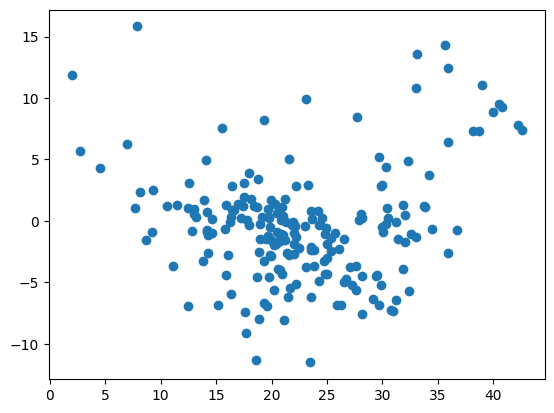

In [103]:
## scatter plot with respect to predictions and residuals
# uniform distribution
plt.scatter(reg_pred,residuals)

In [108]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [105]:
print(mean_absolute_error(Y_test,reg_pred))

3.3586379681920455


In [106]:
print(mean_squared_error(Y_test,reg_pred))

21.348547029943266


In [109]:
## R square and adjusted R square
score = r2_score(Y_test,reg_pred)

In [110]:
score

0.7574968414973706

506